# Desscriptive Analytics

This Jupyter notebook gives few of the high-level insights of given datasets.

In [1]:
import os
import datetime

import pandas as pd
import seaborn as sns
import matplotlib as mat
import matplotlib.pyplot as plt

from matplotlib.dates import YearLocator, MonthLocator, DateFormatter
import matplotlib.dates as mdates

%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

## Input the dataset

Add the file path of the dataset.

In [2]:
def get_csv_file():
    csv = raw_input('Path of CSV file or [ENTER] to get the default: ')
    if not csv:
        csv = os.path.join(os.path.join(os.getcwd(), "in"), "in.csv")
    if not os.path.isfile(csv):
        raise IOError("Specified file '{0}' doesn't exists.".format(csv))
    return csv

In [3]:
df = pd.read_csv(get_csv_file(), parse_dates=['Sales Date'], index_col='Sales Date')

Path of CSV file or [ENTER] to get the default: .\in\in.csv


## Data into pandas 'DataFrame'

In [4]:
df.head(5)

,Part Number,ABC Class,Sales Quantity,Unit Cost,Unit Price,Marketing Spent,Discount Flag
Sales Date,,,,,,,
2012-01-31,Part_12010102,A,24122.0,0.29,1.25,894,0
2012-02-29,Part_12010102,A,22100.0,0.29,0.92,302,1
2012-03-31,Part_12010102,A,27145.0,0.26,1.14,465,0
2012-04-30,Part_12010102,A,20510.0,0.29,1.14,693,0
2012-05-31,Part_12010102,A,23265.0,0.29,0.97,687,1


### Class based meta

In [5]:
group_class = df[['ABC Class','Part Number']].drop_duplicates().groupby('ABC Class')

In [6]:
group_class.describe()

Part Number 
 
 
 ABC Class 
 
 
 
 
 
 
 A 
 count 
 27 
 
 
 unique 
 27 
 
 
 top 
 Part_12000067 
 
 
 freq 
 1 
 
 
 B 
 count 
 37 
 
 
 unique 
 37 
 
 
 top 
 Part_14535348 
 
 
 freq 
 1 
 
 
 C 
 count 
 36 
 
 
 unique 
 36 
 
 
 top 
 Part_11878759 
 
 
 freq 
 1

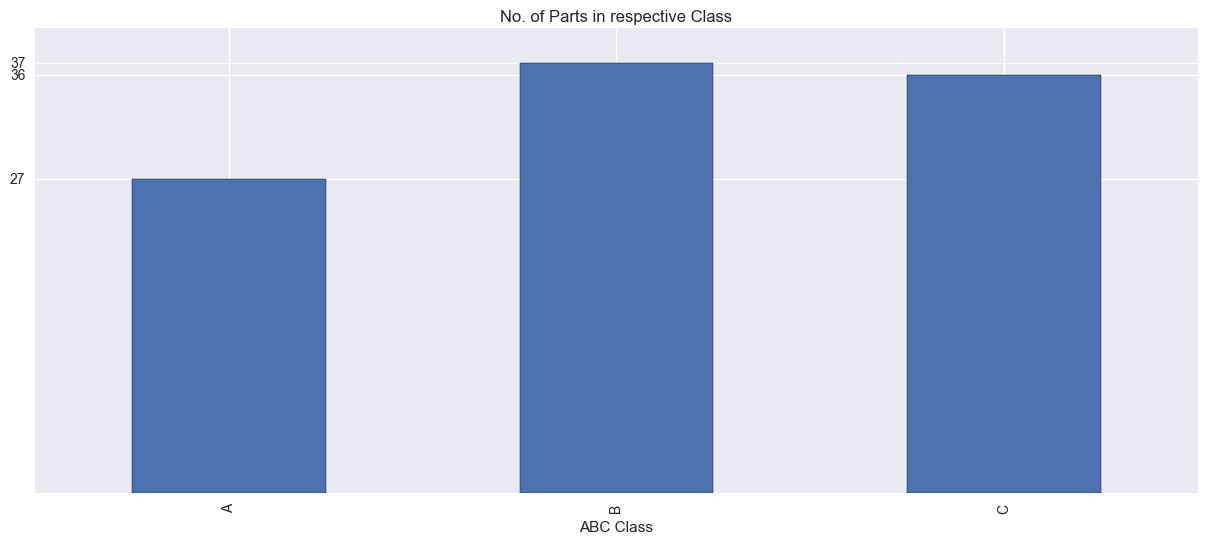

In [7]:
counts = list(group_class.count()['Part Number'])
ax = group_class.count().plot(title='No. of Parts in respective Class', kind='bar', legend=False, yticks=counts)

In [8]:
desc = df[['ABC Class', 'Sales Quantity']].groupby([df.index.year, 'ABC Class']).describe()
desc.index.names = ['Year', 'Class', 'Stats']
desc

Sales Quantity 
 
 
 Year 
 Class 
 Stats 
 
 
 
 
 
 2012 
 A 
 count 
 324.000000 
 
 
 mean 
 13994.947531 
 
 
 std 
 40131.746618 
 
 
 min 
 47.000000 
 
 
 25% 
 1314.250000 
 
 
 50% 
 4082.000000 
 
 
 75% 
 10011.750000 
 
 
 max 
 282775.000000 
 
 
 B 
 count 
 444.000000 
 
 
 mean 
 1404.162838 
 
 
 std 
 975.819226 
 
 
 min 
 34.400000 
 
 
 25% 
 762.000000 
 
 
 50% 
 1335.500000 
 
 
 75% 
 1805.000000 
 
 
 max 
 6951.000000 
 
 
 C 
 count 
 432.000000 
 
 
 mean 
 469.788634 
 
 
 std 
 284.902456 
 
 
 min 
 9.000000 
 
 
 25% 
 229.750000 
 
 
 50% 
 477.500000 
 
 
 75% 
 624.250000 
 
 
 max 
 1895.000000 
 
 
 2013 
 A 
 count 
 324.000000 
 
 
 mean 
 15515.104938 
 
 
 std 
 45956.066292 
 
 
 min 
 54.000000 
 
 
 25% 
 1228.000000 
 
 
 50% 
 4419.500000 
 
 
 ... 
 ... 
 ... 
 ... 
 
 
 2014 
 C 
 std 
 310.936716 
 
 
 min 
 19.000000 
 
 
 25% 
 259.500000 
 
 
 50% 
 476.000000 
 
 
 75% 
 663.250000 
 
 
 max 
 1681.000000 
 
 
 2015 
 A 
 count 
 108.000000 
 
 
 mean 
 18576.833333 
 
 
 std 
 61769.331250 
 
 
 min 
 74.000000 
 
 
 25% 
 1356.500000 
 
 
 50% 
 4331.500000 
 
 
 75% 
 12033.000000 
 
 
 max 
 390630.000000 
 
 
 B 
 count 
 148.000000 
 
 
 mean 
 1503.796622 
 
 
 std 
 1016.473835 
 
 
 min 
 38.700000 
 
 
 25% 
 803.000000 
 
 
 50% 
 1434.000000 
 
 
 75% 
 2007.500000 
 
 
 max 
 4633.000000 
 
 
 C 
 count 
 144.000000 
 
 
 mean 
 508.148611 
 
 
 std 
 312.797535 
 
 
 min 
 23.000000 
 
 
 25% 
 270.000000 
 
 
 50% 
 471.000000 
 
 
 75% 
 703.250000 
 
 
 max 
 1315.000000 
 
 
 
 96 rows × 1 columns

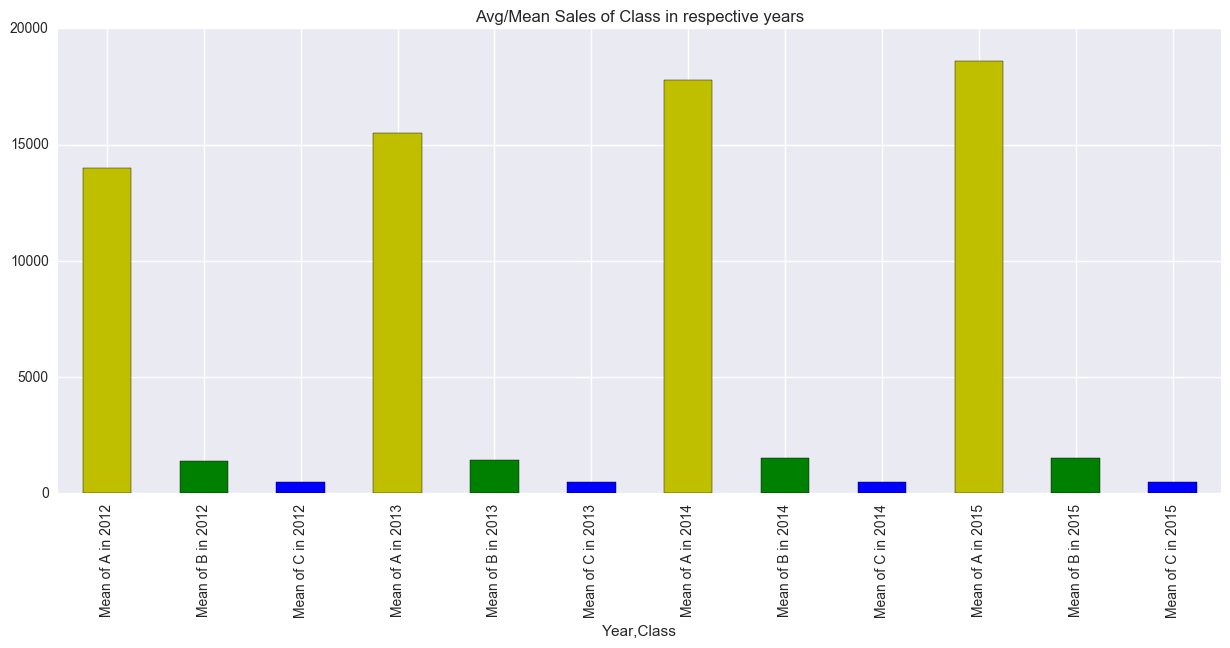

In [9]:
mask = desc.xs('mean', level='Stats')

ax = mask.plot(title="Avg/Mean Sales of Class in respective years", kind='bar', color=['y','g','b'], legend=False)

def func(label):
    label = label.replace('(', '').replace(')', '').replace(' ', '').split(',')
    return "Mean of {0} in {1}".format(label[1], label[0])

ax.set_xticklabels([func(label.get_text()) for label in ax.get_xticklabels()])

(array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.]),
 <a list of 9 Text xticklabel objects>)

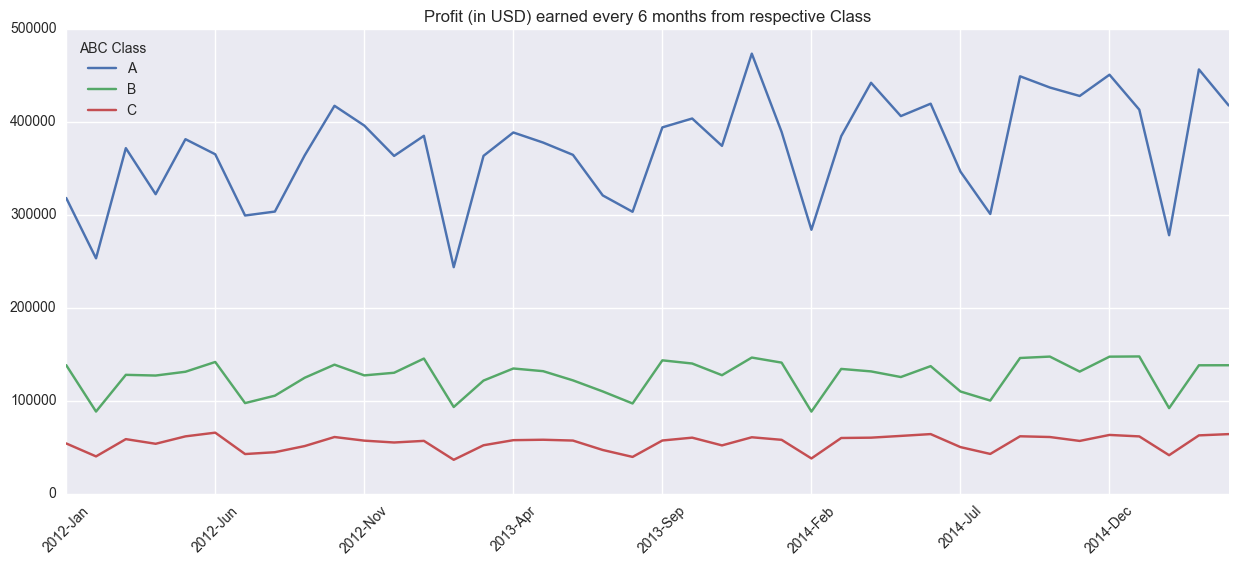

In [10]:
import datetime

def changedatefmt(label):
    label = label.replace('(', '').replace(')', '').replace(' ', '').split(',')
    if not label[0] or not label[1]: return ''
    _ = pd.datetime.strptime("{0}-{1}-1".format(label[0], label[1]), "%Y-%m-%d")
    return _.strftime("%Y-%b")


df['Profit'] = df['Sales Quantity'] * (df['Unit Price'] - df['Unit Cost']) - df['Marketing Spent']
tdf = df[['ABC Class', 'Profit']]
tdf.index.names = ['SalesDate']
tgr = tdf.groupby([tdf.index.year, tdf.index.month, 'ABC Class'])['Profit'].sum().unstack('ABC Class')
ax = tgr.plot(title='Profit (in USD) earned every 6 months from respective Class')
ax.set_xticklabels([changedatefmt(label.get_text()) for label in ax.get_xticklabels()])

plt.xticks(rotation=45)

### Class and Part based meta

In [11]:
def run():

    menu = {
        '1': (('Sales Quantity'), 'Sales Quatity v/s Time'),
        '2': (('Marketing Spent'), 'Spent on Marketing v/s Time')
    }

    def get_class_part():
        klass = raw_input("Enter the Class name: ")
        if not klass in list(df['ABC Class'].drop_duplicates()):
            return Exception("No such class found.")
        partno = raw_input("Enter the valid Part Number from Class {0}: ".format(klass))
        if not partno in list(df[df['ABC Class'] == klass]['Part Number'].drop_duplicates()):
            return Exception ("No such part number found.")
        choice = raw_input("\n".join(["{0}: {1}".format(k, v[1]) for k, v in menu.items()]) + "\nEnter option: ")
        if not choice in menu.keys():
            raise ValueError('Invalid Choice')
        return klass, partno, menu[choice][0]

    klass, part_no, column = get_class_part()
    result = df[(df['ABC Class'] == klass) & (df['Part Number'] == part_no)][[column, 'Discount Flag']]

    ax = result[column].plot(kind='bar', title='{0} v/s Time (where red color shows Discount flag was enabled)'.format(column))
    #ax.xaxis_date()
    bars = ax.get_children()
    bar_list = filter(lambda x: isinstance(x, mat.patches.Rectangle), bars)
    dscnt_flags = list(result['Discount Flag'])
    for i in range(0, len(dscnt_flags)):
        if dscnt_flags[i]:
            bar_list[i].set_color('red')

Enter the Class name: A
Enter the valid Part Number from Class A: Part_12010102
1: Sales Quatity v/s Time
2: Spent on Marketing v/s Time
Enter option: 1


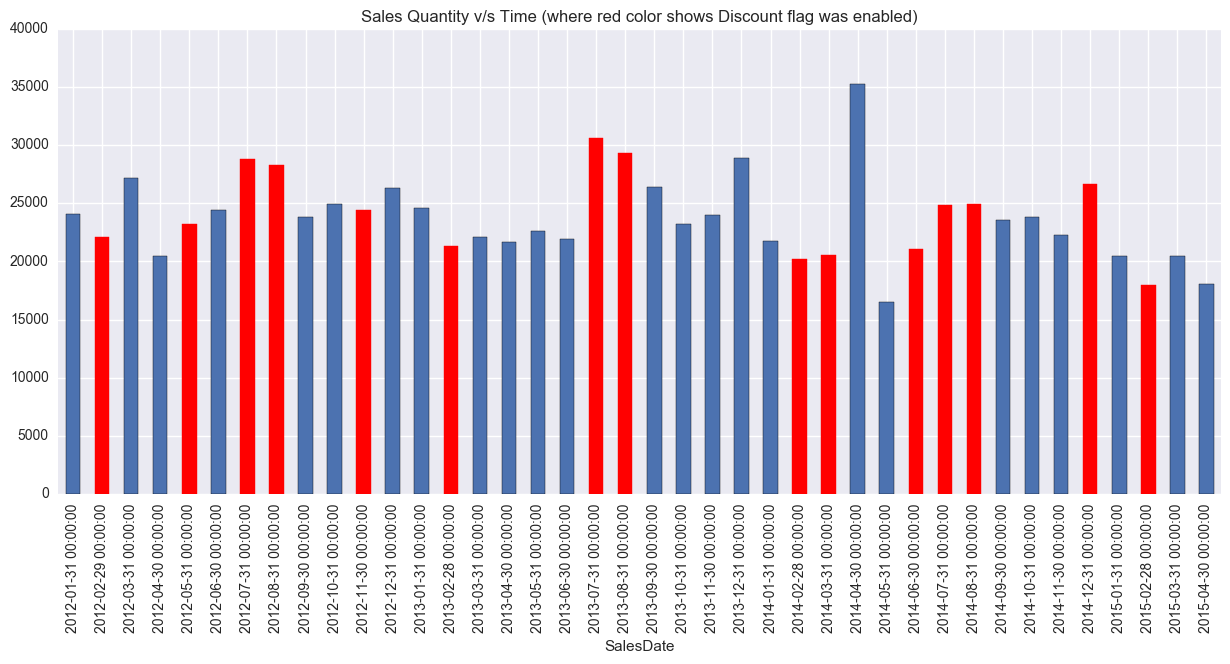

In [12]:
run()

Enter the Class name: C
Enter the valid Part Number from Class C: Part_11818187
1: Sales Quatity v/s Time
2: Spent on Marketing v/s Time
Enter option: 2


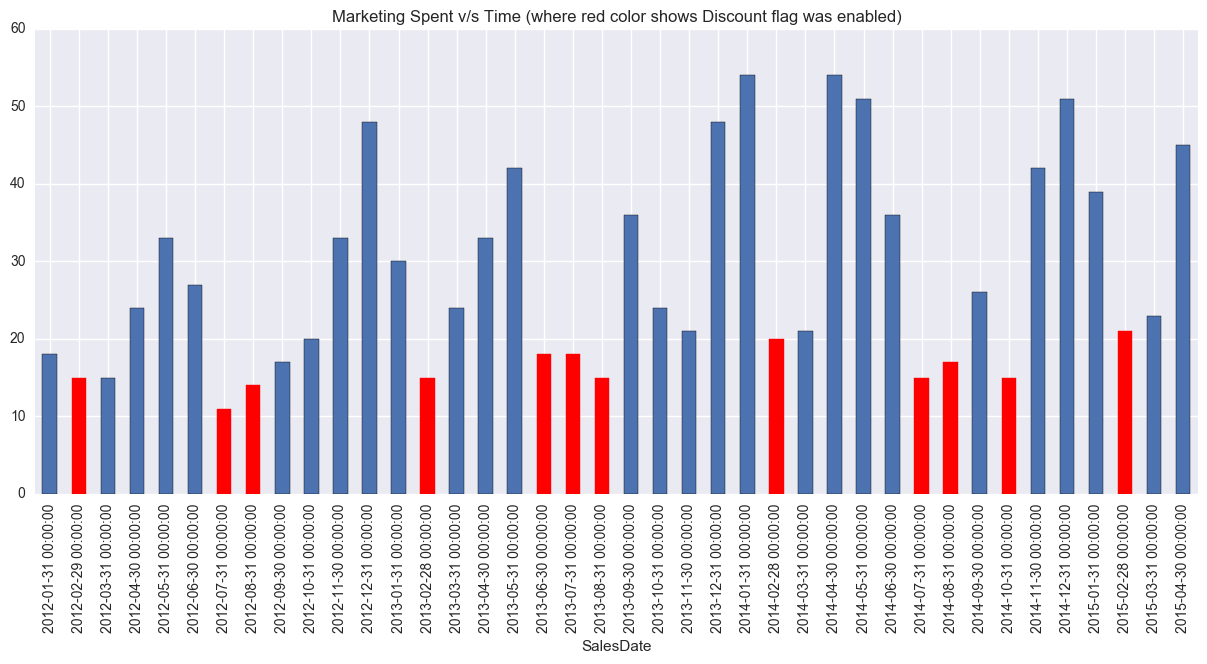

In [13]:
run()